# Code Setup

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt

# Read In and Process Data

In [2]:
# Fetch dataset 
census_income = fetch_ucirepo(id=20) 

# Full dataset
data = census_income.data.features
data = data.drop(columns=['relationship'])

# Define married and unmarried adults based on 'marital-status'
married_adults = data[data['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])]
unmarried_adults = data[~data['marital-status'].isin(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'])]

Note that the "relationship" feature was manually excluded from consideration. In our first attempt at conducting the experiment, we had found that all of the top views used this feature as the grouped-by feature a. This was problematic because of how closely this feature overlapped with the split between the target and references subsets; values for “relationship” included “husband” and “wife”, neither of which showed up as possibilities in the married subset. Likewise, it could also take the value “unmarried”, which only showed up in the married subset. This overlapping seemed to conflate the results as eliminating a number of feature values from consideration in either subset trivially increased aggregate values for the remaining feature values. Additionally, the visualizations would be significantly less meaningful with different features being present among the married and unmarried subsets as it would be harder to compare, so it seemed best to get rid of this feature to foster more interesting results.


# Get Results for Top 5 Aggregate Views

In [3]:
# Use the share-based and pruning-based optimization algorithms from algorithms.py to get the top 5 aggregate views
import algorithms

d:\Compsci-645\final_project\algorithms.py:84: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(( (1-((m-1)/n)) * (2* np.log(np.log(m)) + np.log(np.pi**2/(3*delta)))/ 2*m ))
d:\Compsci-645\final_project\algorithms.py:84: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(( (1-((m-1)/n)) * (2* np.log(np.log(m)) + np.log(np.pi**2/(3*delta)))/ 2*m ))


[('sex', 'age', 'sum'), ('sex', 'hours-per-week', 'sum'), ('sex', 'capital-gain', 'sum'), ('sex', 'education-num', 'sum'), ('sex', 'hours-per-week', 'count')]


The triple (a, m, f) represents the three values associated with an aggregate view of the form:
$$Q_{T} \space= \space SELECT \space a,\space f(m) \space FROM \space D \space GROUP \space BY \space a$$
where D is the Census dataset.
In other words, a is the dimension attribute being grouped by, m is the measure attribute being aggregated, and f being the aggregation function being used. Given the results above, the top five aggregate views are therefore:
1. ('sex', 'age', 'sum')
2. ('sex', 'hours-per-week', 'sum')
3. ('sex', 'capital-gain', 'sum')
4. ('sex', 'education-num', 'sum')
5. ('sex', 'hours-per-week', 'count')

# Write Queries

In [5]:
# Queries for married subset
q1_m = ''' SELECT sex, sum(age) FROM married_adults GROUP BY sex '''
q2_m = ''' SELECT sex, sum("hours-per-week") FROM married_adults GROUP BY sex '''
q3_m = ''' SELECT sex, sum("capital-gain") FROM married_adults GROUP BY sex '''
q4_m = ''' SELECT sex, sum("education-num") FROM married_adults GROUP BY sex '''
q5_m = ''' SELECT sex, count("hours-per-week") FROM married_adults GROUP BY sex '''

# Queries for unmarried subset
q1_u = ''' SELECT sex, sum(age) FROM unmarried_adults GROUP BY sex '''
q2_u = ''' SELECT sex, sum("hours-per-week") FROM unmarried_adults GROUP BY sex '''
q3_u = ''' SELECT sex, sum("capital-gain") FROM unmarried_adults GROUP BY sex '''
q4_u = ''' SELECT sex, sum("education-num") FROM unmarried_adults GROUP BY sex '''
q5_u = ''' SELECT sex, count("hours-per-week") FROM unmarried_adults GROUP BY sex '''


In [6]:
married_queries = [q1_m, q2_m, q3_m, q4_m, q5_m]
unmarried_queries = [q1_u, q2_u, q3_u, q4_u, q5_u]

# Create Visualizations

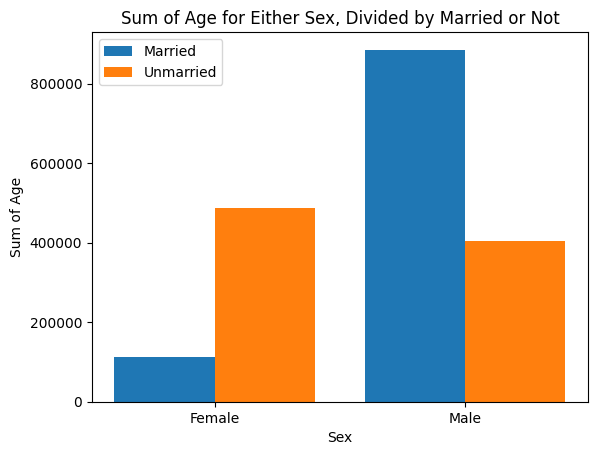

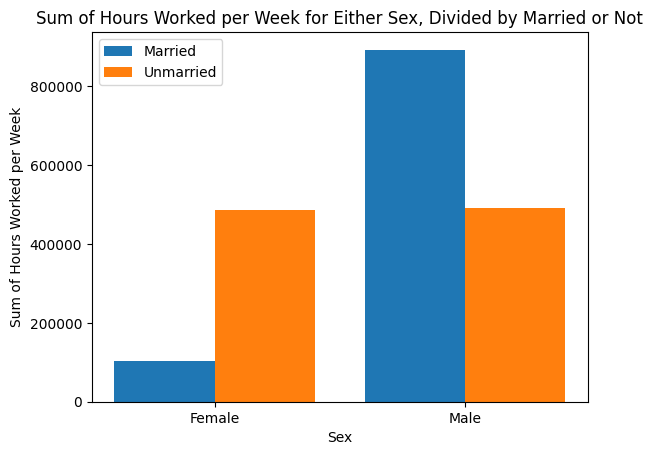

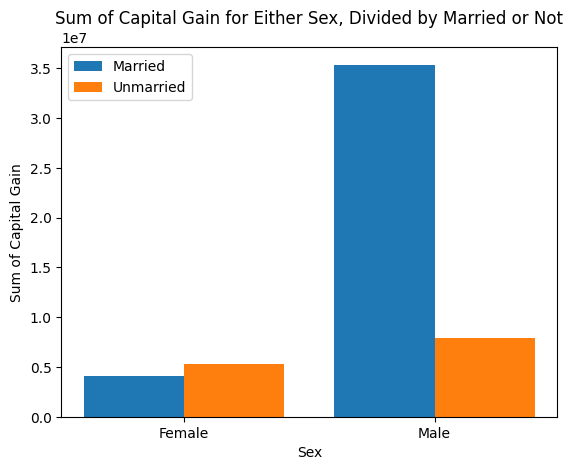

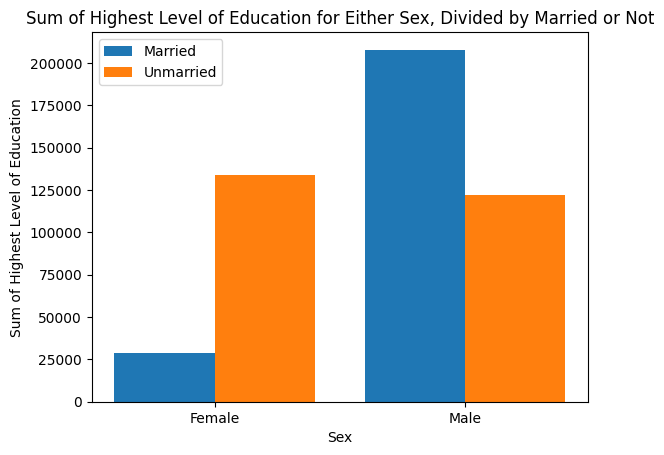

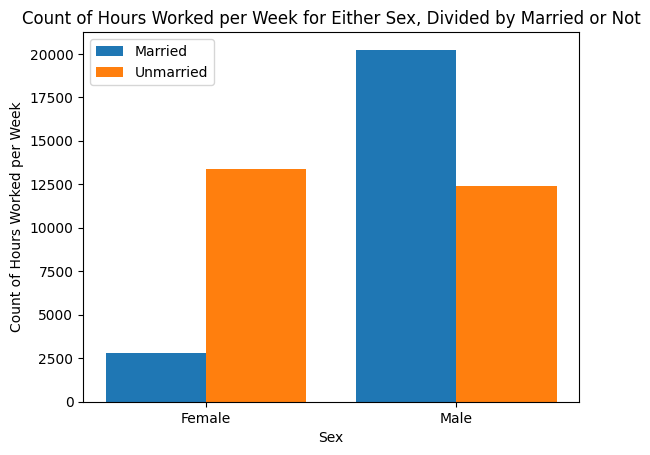

<Figure size 640x480 with 0 Axes>

In [7]:
labels = ['Age', 'Hours Worked per Week', 'Capital Gain', 'Highest Level of Education', 'Hours Worked per Week',]
for i in range(5):
    cur_married = ps.sqldf(married_queries[i], locals())
    cur_unmarried = ps.sqldf(unmarried_queries[i], locals())
    x_vals = cur_married[cur_married.columns[0]].tolist()
    x_axis = np.arange(len(x_vals))
    y_vals_married = cur_married[cur_married.columns[1]].tolist()
    y_vals_unmarried = cur_unmarried[cur_unmarried.columns[1]].tolist()

    plt.bar(x_axis - 0.2, y_vals_married, .4, label='Married')
    plt.bar(x_axis + 0.2, y_vals_unmarried, .4, label='Unmarried')
    plt.xticks(x_axis, x_vals)
    plt.xlabel("Sex")
    if i < 4:
        plt.ylabel("Sum of " + labels[i])
        plt.title("Sum of " + labels[i] + ' for Either Sex, Divided by Married or Not')
    else:
        plt.ylabel("Count of " + labels[i])
        plt.title("Count of " + labels[i] + ' for Either Sex, Divided by Married or Not')
    plt.legend() 
    plt.show()
    plt.clf()

Note that the feature aggregated using "count" is not important given the parameters of the queries being examined; theoretically any feature would produce the same values. This does not change the results since a count aggregation was only chosen as the last of the top 5 views.